## Python - A Crash Course By Example
## Basics
Dr. Victor Pankratius<br>
Massachusetts Institute of Technology<br>
http://www.victorpankratius.com

<hr>

The Python core language is simple. Higher-level features 
are implemented in libraries.

All Python keywords:

<table style="width:50%">
  <tr>
    <td>and</td>
    <td>as</td> 
    <td>assert</td>
    <td>break</td>
  </tr>
  <tr>
    <td>class</td>
    <td>continue</td> 
    <td>def</td>
    <td>del</td>
  </tr>
  <tr>
    <td>elif</td>
    <td>else</td> 
    <td>except</td>
    <td>finally</td>
  </tr>
  <tr>
    <td>for</td>
    <td>from</td> 
    <td>global</td>
    <td>if</td>
  </tr>
  <tr>
    <td>import</td>
    <td>in</td> 
    <td>is</td>
    <td>lambda</td>
  </tr>
  <tr>
    <td>print</td>
    <td>raise</td> 
    <td>return</td>
    <td>try</td>
  </tr>
</table>

Python 3.7.1
- Full grammar specification: https://docs.python.org/3/reference/grammar.html
- Language reference: https://docs.python.org/3/reference/index.html


I'll use "#>" in comments to denote Python interpreter output 

<hr>
## Literature

Examples are from the Phython language reference, libraries, and this book:<br>
A Primer on Scientific Programming with Python, Author: Hans Petter Langtangen, ISBN: 978-3-662-49886-6 (Print) 978-3-662-49887-3 (Online)
http://link.springer.com/book/10.1007/978-3-662-49887-3
(PDF accessible within the MIT network or VPN):
<hr>

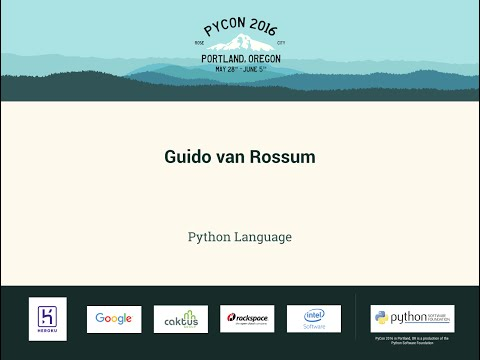

In [1]:
## Keynote: Guido van Rossum on the Python language. PyCon 2016
from IPython.display import YouTubeVideo
YouTubeVideo('YgtL4S7Hrwo')

<hr>
## Basics
Let's start with formula evaluation examples to illustrate basic language features

In [2]:
v0 = 1
g = 9.81
t = 2
y = v0*t + 0.5*g*t**2
print(y)  #> 21.62

21.62


In [3]:
#define above as a function
def f1(v0, g, t):
    """a built-in comment - what does this function do?"""
    return v0*t + 0.5*g*t**2

In [4]:
print ( f1(1, 9.91, 2) )   #> 21.62
print ( f1.__doc__ )       #> a built-in comment - what does this function do?

21.82
a built-in comment - what does this function do?


Note: indent defines block structure; number of indent characters work like a "stack"

Otherwise expect: 
 - IndentationError: unexpected indent
 - IndentationError: unindent does not match any outer indentation level

<hr>
## Lambda functions, decorators, higher-order functions

In [5]:
#***************************
#LAMBDA FUNCTIONS are anonymous, i.e., not bound to a name
f2 = lambda v0, g, t: v0*t + 0.5*g*t**2

print ( f2(1, 9.81, 2) )

21.62


In [6]:
#eval parses argument and evaluates it as a Python expression using global and local namespace
print ( eval('v0*t+ 0.5*g*t**2') )

21.62


In [7]:
#***************************
#--"Higher Order Functions" -> note: different meaning in programming language lingo
#  Creating and passing a function to another function

def myCalc(a,b,c, myfunc):
    return myfunc(a,b,c)
    
def f3(v0, g, t):
    return 0.5*g*t**2  
    
print ( myCalc(1,2,3,lambda v0, g, t: v0*t + 0.5*g*t**2) ) #you can inline lambdas, too!
    
print ( myCalc(1,9.81,2, f1) )      #> 21.62
print ( myCalc(1,9.81,2, f3) )     #> 19.62

12.0
21.62
19.62


In [8]:
#--composition
def composeFunc(f, g):
    return lambda x: f(g(x))

f = composeFunc(lambda x: x*x,  #f
                lambda y: y+1)  #g

print ( f(2) )                  #> 9

9


In [9]:
#---
#--Decorators; idea: "intercept control flow", add something before/after, 
#  e.g., debugging code
def f_plain(x):
    return x * x

def decorator(func):
    print ("Some debugging output. Your code reached this point.")
    return func

f_decorated = decorator(f_plain)

print ( f_decorated(2) )

Some debugging output. Your code reached this point.
4


In [10]:
#---other notation for above decorator
@decorator
def f_plain_decorated(x):
    return x ** 3
    
print ( f_plain_decorated(2) )

Some debugging output. Your code reached this point.
8


<hr>
## Types, implicit typing

In [12]:
#*******************************************************
#--- Types, implicit typing, querying a type
#--- Every object has a type and value. Type determines what operations 
#--- that are allowed on an object, possible values 
a=1
print(type(a))          #> <type 'int'>
print(type(1.0))        #> <type 'float'>
print(type("hello"))    #> <type 'str'>
print(type([]))         #> <type 'list'>
print(type(1+2j))       #> <type 'complex'>

<class 'int'>
<class 'float'>
<class 'str'>
<class 'list'>
<class 'complex'>


In [14]:
#************
#--- Python has built-in support for complex numbers -yeay!
u=1+2j
v=1+0j
print(u*v)          #> (1+2j)

(1+2j)


In [15]:
#-Some important types built into Python (cf. language reference manual)
#
# * numbers.Number: numeric objects. Include
#   * integers  plain: -2147483648-- 2147483647; 
#               long: unlimited range, subject to available memory
#   * Booleans: represented by *objects* True and False
#   * float:    machine-level double precision floating point numbers. 
#               Depends on current machine architecture where the script is 
#               executed (!) Be careful to check for numerical errors...
#   * complex:  represented by pair of machine-level double precision 
#               floating point numbers
#
# * Sequences:  finite ordered sets indexed by non-negative numbers
#    - Immutable sequences
#           * String
#           * Unicode
#           * Tuple
#    - Mutable sequences
#           *List
#           *Byte Array
#
# * Set types: unordered finite sets of unique, immutable objects
#
# * Mappings: finite sets of objects indexed by arbitrary index sets. 
#   * Dictionaries: lists of key-value pairs
#
# * Callable types: types to which the function call operation can be applied
#	* User-defined functions / methods
#	* Generator functions: function or method which uses the 'yield' statement. 
#       generator function, when called, always returns an iterator object which 
#       can be used to execute the body of the function
#	* Built-in functions / methods: wrapper around a C function
#	* Class types / classic classes / class instances
#	
# * Modules: imported by the 'import' statement. A module object has a namespace 
#            implemented by a dictionary object; attribute references are 
#            translated to lookups in this dictionary,  
#            e.g., m.x is equivalent to m.__dict__["x"]
#
# * Code objects: immutable byte-compiled executable Python code
#
# * Files
#
# * Slice objects:  e.g., a[i:j:step],  a[i:j, k:l],  a[..., i:j]

<hr>
## Simple language - import everything philosophy 
### Example: Math libraries & functions

In [16]:
#*******************************************************
# --- Math libraries & functions
# which function are you using? Different libraries 
# means different assumptions. Check when in doubt.

# print sqrt(2)
# > NameError: name 'sqrt' is not defined

In [17]:
from math import sqrt
print (sqrt(2))   #> 1.41421356237
#print sqrt(-1) # >ValueError: math domain error

1.4142135623730951


In [18]:
from cmath import sqrt
#overwrites previous function by new one
#all complex now
print (sqrt(2))   #> (1.41421356237+0j)
print (sqrt(-1))  #> 1j

(1.4142135623730951+0j)
1j


In [19]:
from numpy import sqrt
#might require "conda install --name python35conda numpy" first, where "python35conda" is your environemnt
#import warnings; warnings.filterwarnings("ignore")

print (sqrt(2))   #> 1.41421356237
print (sqrt(-1))  #> nan

1.4142135623730951
nan


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [20]:
from numpy.lib.scimath import sqrt  

print (sqrt(2))   #> 1.41421356237
print (sqrt(-1))  #> 1j

1.4142135623730951
1j


<hr>
## Data structures: Lists

In [21]:
#*******************************************************
#--- Lists

l=[1,2,3]
l.append(4)     #append value
l=l+[5,6]       #append list
l.insert(0,0)   #insert 0 at position 0
print (l)         #> [0, 1, 2, 3, 4, 5, 6]

del(l[1])       #del second element; beware: indexing starts at 0
                #del has side effect, i.e., updates l
del(l[-1])      #del last element
print (l)       #> [0, 2, 3, 4, 5]
print (len(l))  #> 5

[0, 1, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5]
5


In [22]:
#************
# "slicing"
print (l[2:4])    #> [3, 4]
print (l[1:])     #> [2, 3, 4, 5]
print (l[:3])     #> [0, 2, 3]
print (l[1:-1])   #> [2, 3, 4]
print (l[0:5:2])  #> [0, 3, 5]

[3, 4]
[2, 3, 4, 5]
[0, 2, 3]
[2, 3, 4]
[0, 3, 5]


<hr>
## Iterators

In [23]:
#************
# iter() takes an arbitrary object and tries to return 
# an iterator that will return the object's contents or elements
# raising TypeError if the object doesn't support iteration
it=iter(l)
print (it)        #<listiterator object at 0x10a7e2dd0>

print (next(it)) #> 0
print (next(it)) #> 2

0
2


<hr>
## List comprehension, set comprehension

In [24]:
#************
# List comprehension, set comprehension
# Do something with each element in the list. 
# Notation based on notation used by mathematicians
print ( {x**2 for x in l} )    #aka { x^2 | x in l }
print ( [x**2 for x in l] )    #> [0, 4, 9, 16, 25]

{0, 4, 9, 16, 25}
[0, 4, 9, 16, 25]


<hr>
## Map / Reduce

In [25]:
#************
#--finding, filtering, mapping, reducing
# reusing l from above as [0, 2, 3, 4, 5]
import functools

print (l.index(2))    #find index of element "2"
                    #> 1

#print l.index(6)   #> ValueError: 6 is not in list

print (2 in l)        #Query existence of element
                    #> True

print (list (map(lambda x: x>2, l)) )    # apply a function to each element in list l
                                #> [False, False, True, True, True]

print (list (filter(lambda x: x>2, l)) )  #> [3, 4, 5]

1
True
[False, False, True, True, True]
[3, 4, 5]


In [26]:
# reduce

print (l)
print (functools.reduce(lambda x,y: x+y, l)) #> 14
#Given l=[e1,e2,e3, e4]. Calling reduce(f,l) applies f( f( f(e1, e2), e3), e4)

print (functools.reduce(lambda x,y: x if x>y else y, l))    #find max of l using reduce
# note: "algorithmic skeleton" tree of 'reduce' is reusable with different functions

[0, 2, 3, 4, 5]
14
5


In [27]:
#************
#-- Operations on two lists
lX=[1,2,3,4];   lY=[1,4,9,16]

#- vector addition
print (list( 
        map(lambda x, y: x+y, lX,lY) 
    ))
#> [2, 6, 12, 20]

# if map has more than one list, the function is called with an argument 
# list consisting of the corresponding item of each sequence, substituting 
# None for missing values when not all sequences have the same length.

#generate list of lists
pairs = [[x, y] for x, y in zip(lX, lY)]

print (pairs)
#> [[1, 1], [2, 4], [3, 9], [4, 16]]


[2, 6, 12, 20]
[[1, 1], [2, 4], [3, 9], [4, 16]]


<hr>
## Control Flow: Loops, Branching

In [28]:
#*******
#--while

i=0
di=1
while i<6:
    if i % 2 == 0:
        print (i)
    elif i % 3 == 0:
        print ('-- elif: %3')
    else:
        print ('else')
    i+=di

print ("not in the loop")

#note: indent defines block structure; num of indents work like "stack"
#otherwise: 
#> IndentationError: unexpected indent
#> IndentationError: unindent does not match any outer indentation level

0
else
2
-- elif: %3
4
else
not in the loop


In [29]:
#*****
#--for
#think of "for" as an "iterator pattern" over objects; body processes elements

for i in [3,2,7,4]:
    print (i)                     #> 3 2 7 4

3
2
7
4


In [30]:
for i in [[1,2],[3,4],[5,6]]:
    print (i)                     #> [1, 2]   [3,4]    [5,6]

[1, 2]
[3, 4]
[5, 6]


In [31]:
for i in ["bla",3,42.0, 2+3j]:
    print (i)                     #> bla  3  42.0  (2+3j)

bla
3
42.0
(2+3j)


In [32]:
for char in "Python":
    print (char)                #>P
                                #>y
                                #>t
                                #>h
                                #>o
                                #>n

P
y
t
h
o
n


In [33]:
for i in range(1,10,1):
    print (i)                     #> 1 .. 9

#range creates the list [1, 2, 3, 4, 5, 6, 7, 8, 9]. Note: different types in Python 2.7 vs. 3.x

1
2
3
4
5
6
7
8
9


In [34]:
print (type(range(1,10,1)))   #> <class 'range'>
print (range(1,10,1))         #> range(1, 10)
print (list(range(1,10,1)) )  #> [1, 2, 3, 4, 5, 6, 7, 8, 9]

<class 'range'>
range(1, 10)
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
#*****
#--Consider using list comprehensions for common tasks
# Example: cross product
print ( [(x,y) for x in range(1,4) for y in range(1,4)] )
#> [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

print ( [(x,y) for x in range(1,4) for y in range(1,4) if x+y<4] )
#> [(1, 1), (1, 2), (2, 1)]

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
[(1, 1), (1, 2), (2, 1)]


In [36]:
#*****
#--- Traversing two lists simultaneously
l1=[1,2,3,4,5];   l2=[10,20,30,40,50]

#-Option 1
for i in range(len(l1)):
    print ("(%s,%s)" % (l1[i], l2[i]))

(1,10)
(2,20)
(3,30)
(4,40)
(5,50)


In [37]:
#-Option 2: alternative notation inPython
for i,j in zip (l1, l2):
    print ("(%s,%s)" % (i, j))

#> (1,10) ... (5,50)

# Notes:
# zip(iterableObject) returns a list of tuples, where the i-th tuple contains 
# the i-th element from each of the argument sequences, i.e., 
# zip(l1,l2)  -> [(1, 10), (2, 20), (3, 30), (4, 40), (5, 50)]

(1,10)
(2,20)
(3,30)
(4,40)
(5,50)


In [38]:
dotProduct = sum(x*y for x,y in zip(l1, l2)) 
print (dotProduct)
#> 550

550


## Matrix Multiply

In [39]:
import numpy as np

a = np.random.rand(2,2)
b = np.random.rand(2,2)
c = a @ b  # matrix multiply in Python 3.5+
print("a:", a,"\n\n b: ",b,"\n\n c:", c)

#if you don't have Python 3.5
d = np.dot(a, b)
print("\n\n d:", d)

a: [[0.41328035 0.56868067]
 [0.09332117 0.00718026]] 

 b:  [[0.69461312 0.05825022]
 [0.91966043 0.77861986]] 

 c: [[0.81006306 0.46685974]
 [0.07142551 0.01102667]]


 d: [[0.81006306 0.46685974]
 [0.07142551 0.01102667]]


<hr>
## Data Structures: Dictionaries

In [40]:
#************
#--Example 1: a non-ordered dictionary of key-value pairs

meanRadius = {'Venus':0.95, 'Earth': 1, 'Neptune': 3.86, 'Uranus': 3.98}
    #or  meanRadius = dict(Venus=0.95, Earth=1, Neptune=3.86, Uranus=3.98)

#add one more
#meanRadius['Saturn']=9.14

print (meanRadius.keys())
#> ['Earth', 'Venus', 'Neptune', 'Uranus']

print (meanRadius.values())
#> [1, 0.95, 3.86, 3.98]


for x in meanRadius:
    print (x, meanRadius[x])

# > Earth 1
#   Venus 0.95
#   Neptune 3.86
#   Uranus 3.98

print (meanRadius['Venus'])
#> 0.95

print ([meanRadius[x] for x in meanRadius])
#> [1, 0.95, 3.86, 3.98]


print ("Venus" in meanRadius)
#> True


print (list(enumerate(meanRadius.keys(), start=0)))
#> [(0, 'Earth'), (1, 'Venus'), (2, 'Neptune'), (3, 'Uranus')]

dict_keys(['Venus', 'Earth', 'Neptune', 'Uranus'])
dict_values([0.95, 1, 3.86, 3.98])
Venus 0.95
Earth 1
Neptune 3.86
Uranus 3.98
0.95
[0.95, 1, 3.86, 3.98]
True
[(0, 'Venus'), (1, 'Earth'), (2, 'Neptune'), (3, 'Uranus')]


In [41]:
#************
#--Example 2: Polynomial evaluation
# p(x)=1+2x+3x^4+5x^20   , evaluate p(2)

orderCoeff={0:1, 1:2, 4:3, 20:5}    #use a dictionary

def polyEval(coeffList, x):
    return sum( [coeffList[coeff]*x**coeff   for coeff in coeffList] )
    #start by reading this list comprehension backwards: iterate throuh all
    #coeffs in dictionary (for part), get current coeff, evaluate at x, 
    #add result to list, sum the list up
    
print (polyEval(orderCoeff, 2))
#> 5242933

5242933


In [42]:
#************
#--Example 3: Generate a dictionary using x^2
demoDict1= {x: x**2 for x in (2, 4, 6)}
demoDict2= {x: x**2 for x in range(1,10)}

print (demoDict1)
#> {2: 4, 4: 16, 6: 36}

print (demoDict2)
#> {1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


{2: 4, 4: 16, 6: 36}
{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


<hr>
## Object-Oriented Programming: Classes

In [43]:
#**********
# Example 1

#--Create a class
class Y:
    """description of what this class does"""
    
    def __init__(self, v0, g):      #Called when instance is created.
        self.v0 = v0
        self.g = g
    
    def valueAt(self, t):
        return self.v0*t + 0.5*self.g*t**2
        
    def __str__(self):              # used by the print statement  
                                    # string representation of object.       
        return "The values are v0 = %s, g = %s" % (self.v0, self.g)

        
yEarth = Y(0, 9.81)             # create an instance
yEarth.g = 9.8067               # shows how to reset value for g
yMars  = Y(0, 3.7)

print (yEarth.valueAt(5))         #> 122.58375
print (yMars.valueAt(5))          #> 46.25
print (yEarth)                    #> The values are: v0 = 0, g = 9.81
print (yEarth.v0)                 #> 0
print (yEarth.__doc__)            #> description of what this class does

print (yEarth.__dict__ )          #> {'v0': 0, 'g': 9.8067}
                                  #internally, Y stores v0 and g in a
                                  #dictionary that can be accessed via __dict__

print (type(Y), type(yEarth))     #<class 'type'> <class '__main__.Y'>

122.58375
46.25
The values are v0 = 0, g = 9.8067
0
description of what this class does
{'v0': 0, 'g': 9.8067}
<class 'type'> <class '__main__.Y'>


In [44]:
#--Create a subclass that extends Y
class Y_extended(Y):
    
    def __init__(self, v0, g):
        Y.__init__(self, v0, g)        
        
    def printValueRange(self, min, max):
        print ( [self.valueAt(v) for v in range(min,max)] )


newYEarth = Y_extended(0, 9.81)
newYEarth.printValueRange(0,6)  #> [0.0, 4.905, 19.62, 44.145, 78.48, 122.625]

[0.0, 4.905, 19.62, 44.145, 78.48, 122.625]


In [45]:
#**********
# Example 2

# -- callable vs. non-callable class


#a non-callable function
class f_noncallable:
        def __init__(self, myVar):
            self.var = myVar
            
        def valueAt(self, t):
            return self.var+t
            
#a callable function
class f_callable:
        def __init__(self, myVar):
            self.var = myVar
            
        def __call__(self, t):  # Called when the instance is 'called'
            return self.var+t   # as a function; if this method is defined, 
                                # x(arg1, arg2, ...) is shorthand for 
                                # x.__call__(arg1, arg2, ...)

        
f_non = f_noncallable(42)       #initialize
print (f_non.valueAt(1))        #> 43

# print (f_non(1) )             #does not work. Causes
                                #AttributeError: noncallable 
                                #instance has no __call__ method

print (callable(f_non))         #>False



f_c = f_callable(42)            #initialize
print (f_c(1))                  #> 43
                                #call works now; invoke f_c now more 'naturally'
                                # as f_c(1) instead of f_c.valueAt(1)

print (callable(f_c))           #>True

43
False
43
True


In [46]:
#**********
# Example 3

# --special method names and operator overloading
class myVector:
    def __init__(self, dataList):
        self.dataList=dataList
        
    def __str__(self):
        return repr(self.dataList)
    
    #special method names like "__add__" can be invoked with special syntax -
    #see calls below - to emulate numeric objects
    #This is Python's approach to operator overloading, allowing classes to 
    #define their own behavior with respect to language operators.    
    def __add__(self, otherVector):
        return [i+j for i,j in zip(self.dataList,otherVector.dataList)]

    def __sub__(self, otherVector):
        return [i-j for i,j in zip(self.dataList,otherVector.dataList)]


v1 = myVector([1,2,3])
v2 = myVector([1,1,1])
print (v1, v2)                #> [1, 2, 3] [1, 1, 1]
print (v1 + v2)               #> [2, 3, 4]
print (v1 - v2)               #> [0, 1, 2]



#Notes: 
#See Python language reference manual for other special method names, e.g,
# x<y       calls   x.__lt__(y)
# x<=y      calls   x.__le__(y)
# abs(x)    calls   x.__abs(self)
# x[key]    calls   x.__getitem__(self, key)

[1, 2, 3] [1, 1, 1]
[2, 3, 4]
[0, 1, 2]


<hr>
## Functions with multiple return values

In [47]:
#multiple variable assignment; no need for 'temp' variable to swap a and b
a,b = 0,42
b,a = a,b
print (a,b)                           #> 42 0

42 0


In [48]:
#***********
#--Example 1
def f(a,b):
    return a+b, a-b
    
x, y = f(3, 4)

print (x, y)              #> 7 -1
print (type(f(3,4)))      #> <type 'tuple'>



#***********
#--Example 2
def g(x):
    return x, x**2, x**4
    
print (g(2))              #> (2, 4, 16)
print (type (g(2)))       #> <type 'tuple'>

7 -1
<class 'tuple'>
(2, 4, 16)
<class 'tuple'>


In [49]:
#*************************************************
# Function arguments with default values

def h(x,y=1):
    return x+y
    
print (h(1,2))
#> 3

print (h(1))  #no y specified, use default value for y
#> 2

3
2


<hr>
## Generators

In [50]:
#Generator expressions
gen1 = (x*x for x in range(10))
print (gen1)                          #> <generator object <genexpr> at 0x103e7d050>
print (sum(gen1))                     #> 285


gen2 = (3*x**4 for x in range(5,10))
print (next(gen2))                   #> 1875
print (next(gen2))                   #> 3888

gen3 = (x % 2 for x in range(10))
print (list(gen3))                    #> [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


# Rationale: don't keep all generator elements in memory, but generate element
# when called, one at a time.
# Generator expression : sum(x*x for x in range(10)) saves memory, compared 
# to list comprehension  sum([x*x for x in range(10)])

<generator object <genexpr> at 0x10d0adf68>
285
1875
3888
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [51]:
# Generator function - Fibonacci example
#   A generator function has "yield" statement that returns next element.
#   Generators retain state between calls
def fibonacci(max):
    a, b = 0, 1
    while a < max:
        yield a
        a, b = b, a + b         #right-hand side expressions evaluated first,
                                #from left to right, then assignments
        
print (list(fibonacci(6)))        #> [0, 1, 1, 2, 3, 5]



#Illustration: above without multiple variable assignment
def fibonacci_v2(max):
    a=0
    b=1
    while a < max:
        yield a
        a_old=a
        a = b
        b = a_old+b                 

print (list(fibonacci(6)))            #> [0, 1, 1, 2, 3, 5]

[0, 1, 1, 2, 3, 5]
[0, 1, 1, 2, 3, 5]


<hr>
## Iterators

In [52]:
import itertools


c=itertools.cycle('ABC')
print ([next(c) for a in range(10)])
#> ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A']

['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A']


In [53]:
c=itertools.count(5, 3)
print ([next(c) for a in range(10)])
#> [5, 8, 11, 14, 17, 20, 23, 26, 29, 32]

[5, 8, 11, 14, 17, 20, 23, 26, 29, 32]


In [54]:
#Element selector at position
print (list(itertools.compress('This is my text',[1,1,0,1])))
#> ['T', 'h', 's']

['T', 'h', 's']


In [55]:
#Select elements from list until a predicate fails
print (list(itertools.takewhile(lambda x: x<4, [1,0,3,4,17,5,1])))
#> [1, 0, 3]

[1, 0, 3]


In [56]:
###
# Combinatoric generators

print (list(itertools.permutations('ABC')))
#> [('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), 
#  ('C', 'A', 'B'), ('C', 'B', 'A')]

print (list(itertools.permutations('ABC',2)))
#> [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]

print (list(itertools.combinations('ABC',2)))
#> [('A', 'B'), ('A', 'C'), ('B', 'C')]

[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]
[('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]
[('A', 'B'), ('A', 'C'), ('B', 'C')]


<hr>
## Closures

In [57]:
#create function that 'remembers' bound values of its enclosing scope
#closure ~ function + environment with references to non-local variables

def start(s):   #this is a 'higher-order function' that
                #returns closure cosisting of 
                #   - reference to function 'increment' + 
                #   - reference to variable s
                #So when 'increment' is invoked, it 'knows' where to find s.
                #Variable s will be bound to a value, i.e., "closed"
    def increment(i):
        return s+i
    return increment

f = start(0)    #f now refers to function 'increment'
g = start(98)   #g now refers to function 'increment'

#increment 'knows' the value of s from its attached __closure__ property
print (f.__closure__[0].cell_contents)        #> 0
print (g.__closure__[0].cell_contents)        #> 98


print (f(1))  #> 1
print (g(2))  #> 100


0
98
1
100


<hr>
## Metaprogramming

In [58]:
# Print a list of methods that can be called on object l
l = [1,2,3]
print ([method for method in dir(l) if callable(getattr(l, method))])

# dir() or dir(object)
# - Without arguments, return the list of names in the current local scope. 
# - With an argument, attempt to return a list of valid attributes for that object.


['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


<hr>
## Runtime performance measurement

In [59]:
# (there are better libraries to do this; illustrating principles here)

import time, math

def testFunc1(x):
    return x
    
def testFunc2(x):
    return math.factorial(x)

functionsToTest = [testFunc1, testFunc2]   
#note1: think about how you would do this in other languages

execTimes = [] # CPU times for functionsToTest[i]

for func in functionsToTest:
    t0 = time.clock()
    func(90)
    t1 = time.clock()
    cpu_time = t1 - t0
    execTimes.append(cpu_time)
    
print (execTimes)


[4.000000000115023e-06, 1.3000000000040757e-05]
